In [ ]:
from google.colab import files


uploaded = files.upload()



Saving african_crises.csv to african_crises.csv


In [ ]:
import pandas as pd
import io
  
data = pd.read_csv(io.BytesIO(uploaded['african_crises.csv']))
print(data)

      case  cc3   country  ...  currency_crises  inflation_crises  banking_crisis
0        1  DZA   Algeria  ...                0                 0          crisis
1        1  DZA   Algeria  ...                0                 0       no_crisis
2        1  DZA   Algeria  ...                0                 0       no_crisis
3        1  DZA   Algeria  ...                0                 0       no_crisis
4        1  DZA   Algeria  ...                0                 0       no_crisis
...    ...  ...       ...  ...              ...               ...             ...
1054    70  ZWE  Zimbabwe  ...                1                 0          crisis
1055    70  ZWE  Zimbabwe  ...                0                 0       no_crisis
1056    70  ZWE  Zimbabwe  ...                0                 0       no_crisis
1057    70  ZWE  Zimbabwe  ...                0                 0       no_crisis
1058    70  ZWE  Zimbabwe  ...                0                 0       no_crisis

[1059 rows x 14

In [ ]:
data.shape

(1059, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [ ]:
# Divide the data into “attributes”  X and “labels”  Y 
X = data[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]
# Define the Y variable 
Y = data['banking_crisis']

## percentage of  crisis & no crisis

count_no_crisis = len(data[Y=='no_crisis'])
count_crisis = len(data[Y=='crisis'])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


In [ ]:
Y= pd.get_dummies(Y)
Y = Y.drop(['no_crisis'], axis = 1)

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_Y=os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of crisis in oversampled data",len(os_data_Y[os_data_Y['Y']==1]))
print("Number of no crisis",len(os_data_Y[os_data_Y['Y']==0]))
print("Proportion of no crisis data in oversampled data is ",len(os_data_Y[os_data_Y['Y']==0])/len(os_data_X))
print("Proportion of crisis data in oversampled data is ",len(os_data_Y[os_data_Y['Y']==1])/len(os_data_X))

length of oversampled data is  1360
Number of crisis in oversampled data 680
Number of no crisis 680
Proportion of no crisis data in oversampled data is  0.5
Proportion of crisis data in oversampled data is  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X=os_data_X
Y=os_data_Y
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: inf
         Iterations 12
                                 Results: Logit
Model:                     Logit                  Pseudo R-squared:       inf   
Dependent Variable:        Y                      AIC:                    inf   
Date:                      2021-06-11 15:43       BIC:                    inf   
No. Observations:          1360                   Log-Likelihood:         -inf  
Df Model:                  8                      LL-Null:                0.0000
Df Residuals:              1351                   LLR p-value:            1.0000
Converged:                 1.0000                 Scale:                  1.0000
No. Iterations:            12.0000                                              
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
X=os_data_X
Y=os_data_Y
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 12
                                 Results: Logit
Model:                     Logit                  Pseudo R-squared:       inf   
Dependent Variable:        Y                      AIC:                    inf   
Date:                      2021-06-11 15:43       BIC:                    inf   
No. Observations:          1360                   Log-Likelihood:         -inf  
Df Model:                  8                      LL-Null:                0.0000
Df Residuals:              1351                   LLR p-value:            1.0000
Converged:                 1.0000                 Scale:                  1.0000
No. Iterations:            12.0000                                              
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.score(X,Y)

0.9419117647058823

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(clf.coef_)))

,0,1
0,systemic_crisis,[7.816041413743628]
1,exch_usd,[-0.004404696065513252]
2,domestic_debt_in_default,[-0.4835507575888725]
3,sovereign_external_debt_default,[-0.3186639823725079]
4,gdp_weighted_default,[1.1656656632786104]
5,inflation_annual_cpi,[0.005292633762368325]
6,independence,[2.497553497860037]
7,currency_crises,[0.27337052469871886]
8,inflation_crises,[0.8377153762950065]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[205   0]
 [ 20 183]]


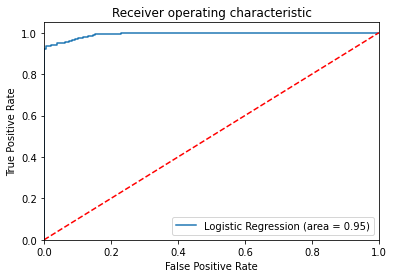

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()